In [1]:
#necessary imports
import Minhash
import csv
import pandas as pd

In [2]:
#getting in the data we'll be using
data = pd.read_csv('user-ct-test-collection-01.txt', sep = "\t")
urllist = data.ClickURL.dropna().unique()

Insert all URLs to your MinHash Hashtables. Use K = 2, L = 50, B = 64, R = 220 You can treat each URL as a string and use 3-gram in your MinHash function.

In [3]:
len(urllist) #there seems to be no duplicates

377870

Insert all URLs to your MinHash Hashtables. Use K = 2, L = 50, B = 64, R = 220. You can treat each URL as a string and use 3-gram in your MinHash function.

In [4]:
minhashTable1 = Minhash.HashTable(K = 2, L = 50, B = 64, R = 2**10)

In [5]:
id_map = {} #used to keep track of the ids and strings. an id will map to a string

In [6]:
seen_set = set([])

In [7]:
eyedee = 0
for strg in urllist[:50000]:
    if strg not in seen_set:
        seen_set.add(strg)
        minhashTable1.insert(strg, eyedee)
        id_map[eyedee] = strg
        eyedee += 1

In [8]:
len(minhashTable1.L_lst[2])

16959

### Task 1:
Sample 200 URLs from urllist as the query set. For each URL, compute the MinHash codes and retrieve all the items in the hash tables. Evaluate the quality of retrieved items by reporting the average Jaccard similarity of the query URL and retrieved URLs.


In [9]:
import random
random.seed(27)

In [10]:
#query_set = set([random.choice(urllist) for i in range(200)])
query_set = [random.choice(urllist) for i in range(200)]

In [11]:
#Jaccard Similarity
def jaccard_sim(str1, str2):
    '''
    Inputs two strings s1 and s2
    Returns the  true jaccard similarity of the two strings
    '''
    set_str1 = set([])
    set_str2 = set([])
    
    #Creating the three gram representation of each of the strings
    #for string 1
    for i in range(len(str1)-2):
        set_str1.add(str1[i:i+3])
    #for string 2
    for i in range(len(str1)-2):
        set_str2.add(str2[i:i+3])
    
    #calculate the cardinality of the intersection and the union of the two
    card_intersection = set_str1.intersection(set_str2)
    card_union = set_str1.union(set_str2)
    return(len(card_intersection)/len(card_union))

In [12]:
from statistics import mean 
import time

In [13]:
j_sim_avg_lst = []
time0 = time.time()
#list of the average similarities 
top10_avg_lst = []
for query in query_set:
    sim_ids = minhashTable1.lookup(query) #the set of similar items
    sim_strs = [id_map[aidee] for aidee in sim_ids] # the set of similar strings
    
    #list of the jaccard similarities of the query and the similar results
    q_jaccard_sim_lst = [jaccard_sim(query, sim_string) for sim_string in sim_strs]
    avg_sim = mean(q_jaccard_sim_lst)
    
    q_jaccard_sim_lst.sort(reverse = True)
    top10_avg_sim = mean(q_jaccard_sim_lst[:10])
    
    j_sim_avg_lst.append(avg_sim)
    top10_avg_lst.append(top10_avg_sim)
print(time.time() - time0)

243.929340839386


1. Report the mean Jaccard similarity of the URL retrieved.

In [14]:
mean(j_sim_avg_lst) #0.2249050242276318

0.2249050242276318

2. Now for every retrieved set (candidate set), filter it to find the top-10 URLs only (based on
actual Jaccard Similarity) . Report the mean Jaccard similarity of the top-10 URLs retrieved
after filtering.

In [15]:
mean(top10_avg_lst)

0.4720814311978734

3. Report the query time.

In [16]:
#322.677348613739

### Task 2: 
Write a function to compute the pairwise Jaccard similarity of those 200 URLs in the query
set with all the other elements using a brute-force way. Use the computational time for this task to
estimate the expected total time of computing the pairwise Jaccard similarity of all URLs.

In [17]:
#Essentially I have to find the jaccard similarity of these 200 with all the other strings. Brute force Jaccard. I see
time1 = time.time()
for query in query_set: #each string in the query
    for string2 in urllist[:50000]:
        if string2 != query:
            j_sim = jaccard_sim(query,string2)
print(time.time() - time1)            

229.74048805236816


In [18]:
#time: 309.7520561218262

### Task 3: 
Tuning K (K = 2, 3, 4, 5, 6) and L (L = 20, 50, 100) observe how the average jaccard similarities of the query url and retrieved urls change accordingly.
1. Report the mean Jaccard similarity of the URL retrieved and also the time per query for each
of the combination.

In [ ]:
#inserting only 500 things for now in order to make sure my implementation here is working properly
for kay in [2, 3, 4, 5, 6]:
    for el in [20, 50, 100]:
        hashmin_table = Minhash.HashTable(K = kay, L = el, B = 64, R = 2**10)
        time2 = time.time()
        id_map2 = {}
        eyedee = 0
        for strg in urllist[:50000]: #50000
            hashmin_table.insert(strg, eyedee)
            id_map2[eyedee] = strg
            eyedee += 1
        avg_lst = []
        for query in query_set:
            sim_ids = hashmin_table.lookup(query) #the set of similar items
            if len(sim_ids) == 0: #error handling 
                continue
            sim_strs = [id_map[aidee] for aidee in sim_ids] # the set of similar strings

            #list of the jaccard similarities of the query and the similar results
            q_jaccard_sim_lst = [jaccard_sim(query, sim_string) for sim_string in sim_strs]
            avg_sim = mean(q_jaccard_sim_lst)
            avg_lst.append(avg_sim)
        print("K: " + str(kay) + ", L: " + str(el) + ", time: " + str(time.time()-time2) + " , avg simiarity:" + str(mean(avg_lst)))

K: 2, L: 20, time: 240.8646821975708 , avg simiarity:0.237377802633455
K: 2, L: 50, time: 326.92490553855896 , avg simiarity:0.22730035431820625
K: 2, L: 100, time: 491.1278853416443 , avg simiarity:0.2219665772378992
K: 3, L: 20, time: 94.01960778236389 , avg simiarity:0.2581513411860116
K: 3, L: 50, time: 310.67729902267456 , avg simiarity:0.23579347629353417
K: 3, L: 100, time: 461.5170123577118 , avg simiarity:0.2337374103282454

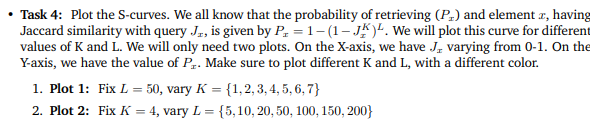

In [21]:
#creating the probability function
def computeProbRetrieval(j_x, k, l):
    '''
    Inputs: 
    k is an int representing the number of hash functions per LSH table.
    L is an int representing the number of hash table in the LSH table.
    j_x is a float representing the jaccard similarity of an element x in the dataset\
    and a query being looked up in the dataset.
    
    Effect:
    computes the probability of retrieving an element x from an LSH table with parameters k and l 
    '''
    return (1 - (1-(j_x)**k)**l)
    

Text(0, 0.5, 'probability')

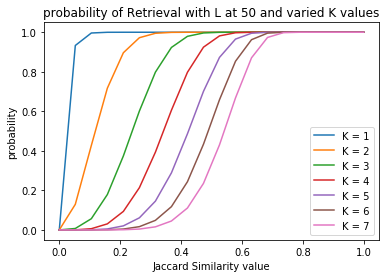

In [24]:
from matplotlib import pyplot as plt
import numpy as np
# I will be using increments of 0.05
j_x_lst = np.linspace(0,1,20)

#info for plot 1
L = 50
klist = [1, 2, 3, 4, 5, 6, 7]
for kay in klist:
    prob_list = [computeProbRetrieval(xval, kay, L) for xval in j_x_lst]
    plt.plot(j_x_lst, prob_list, label= "K = " + str(kay))
plt.title("probability of Retrieval with L at 50 and varied K values")
plt.legend(loc='lower right')
plt.xlabel('Jaccard Similarity value')
plt.ylabel('probability')

Text(0, 0.5, 'probability')

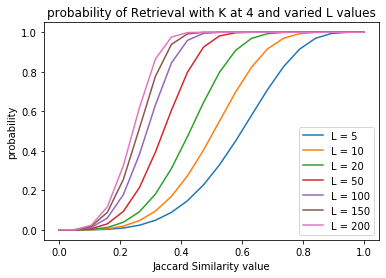

In [25]:
# info for plot 2
L_list = [5, 10, 20, 50, 100, 150, 200]
kay = 4
for el in L_list:
    prob_list = [computeProbRetrieval(xval, kay, el) for xval in j_x_lst]
    plt.plot(j_x_lst, prob_list, label= "L = " + str(el))
plt.title("probability of Retrieval with K at 4 and varied L values")
plt.legend(loc='lower right')
plt.xlabel('Jaccard Similarity value')
plt.ylabel('probability')